# Youtube ADView Prediction


## Context :
 Youtube advertisers pay content creators based on adviews and clicks for the
 goods and services being marketed. They want to estimate the adview based
 on other metrics like comments, likes etc. The problem statement is therefore
 to train various regression models and choose the best one to predict the
 number of adviews. The data needs to be refined and cleaned before feeding
 in the algorithms for better results.


In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Objective :

 To build a machine learning regression to predict youtube adview count based
 on other youtube metrics.


In [92]:
#IMPORTING LIBRARIES
# !pip install tensorflow

In [4]:
# pip install keras

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow
import warnings
warnings.filterwarnings('ignore')

In [6]:
#IMPORTING DATA

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Data_sets/train.csv")

In [8]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [9]:
df.info

<bound method DataFrame.info of            vidid  adview    views likes dislikes comment   published duration  \
0      VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1      VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2       VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3      VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4      VID_10175       1      666     1        0       0  2016-06-29    PT31S   
...          ...     ...      ...   ...      ...     ...         ...      ...   
14994     VID_31       2   525949  1137       83      86  2015-05-18  PT6M10S   
14995   VID_5861       1   665673  3849      156     569  2015-10-20  PT3M56S   
14996    VID_805       4     3479    16        1       1  2013-08-23  PT3M13S   
14997  VID_19843       1      963     0        0       0  2010-10-02    PT26S   
14998   VID_8534       1    15212    22        5       4  2016-02-19   PT1M1S

In [10]:
df.shape

(14999, 9)

In [11]:
df.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [12]:
df[df['views'] == 'F']

,vidid,adview,views,likes,dislikes,comment,published,duration,category
7447,VID_9269,1,F,0,1,0,2013-10-03,PT21M28S,D
8112,VID_9262,1,F,1,0,0,2013-09-18,PT21M6S,D


In [13]:
#INSTERD OF REMOVING ALL ROWS THAT CONTAIN "F" (views,likes,dislikes,comment). IT IS BETTER TO CHANGE "F"VALUES TO "0".
#IF WE DROP "F" THEN THERE WILL BE LOSS OF DATA
df['views'].replace(to_replace='F',value=0,inplace=True)
df['comment'].replace(to_replace='F',value=0,inplace=True)
df['likes'].replace(to_replace='F',value=0,inplace=True)
df['dislikes'].replace(to_replace='F',value=0,inplace=True)

In [14]:
#TYPE  CASTING COLUMNS ('views','comment','likes','dislikes')FROM OBJECT TO INT32
df[['views','comment','likes','dislikes']] = df[['views','comment','likes','dislikes']].astype('int32')

In [15]:
df.dtypes

vidid        object
adview        int64
views         int32
likes         int32
dislikes      int32
comment       int32
published    object
duration     object
category     object
dtype: object

In [16]:
# CONVERTING PUBLISHED DATA TYPE FROM OBJECT TO PANDAS DATETIME

In [17]:
df['published'] = pd.to_datetime(df['published'])

df['year'] = df['published'].dt.year
df['month'] = df['published'].dt.month
df['day'] = df['published'].dt.day

In [18]:
df.dtypes

vidid                object
adview                int64
views                 int32
likes                 int32
dislikes              int32
comment               int32
published    datetime64[ns]
duration             object
category             object
year                  int64
month                 int64
day                   int64
dtype: object

In [19]:
df['duration'][10][2:]

'12M25S'

In [20]:
# REMOVING 'PT' FROM EACH VALUE OF DURATION COLUMN
df['duration'] = df['duration'].apply(lambda x : x[2:])

In [21]:
df['duration'].head(10)

0     7M37S
1     9M30S
2     2M16S
3     4M22S
4       31S
5       15S
6     3M20S
7       58S
8    27M50S
9    11M19S
Name: duration, dtype: object

In [22]:
# FUNCTION THAT TAKES DURATION COLUMN'S VALUES(strings),
# SPLITS THEM AS PER REGULAR EXPRESSION AND,
# CALCULATES TOTAL SECONDS
def get_total_seconds(duration):

    # Extract the numeric values using regular expression
    time = re.findall(r'\d+',duration)

    total_seconds = 0

    if len(time) >= 3:
        total_seconds += int(time[0]) * 3600  # hours to seconds
        total_seconds += int(time[1]) * 60    # minutes to seconds
        total_seconds += int(time[2]) * 1     # only seconds

    elif len(time) == 2:
        total_seconds += int(time[0]) * 60  # minutes to seconds
        total_seconds += int(time[1]) * 1    # only seconds
    else:
        total_seconds += int(time[0]) * 1  # only seconds

    return total_seconds

# CREATING A NEW FEATURE WHICH HAS TOTAL VIDEO LENGTH IN SECONDS
df['duration_sec'] = df['duration'].apply(get_total_seconds)

In [23]:
# CHECKING NUMBER OF UNIQUE VALUES IN VIDEO ID COLUMN
df['vidid'].nunique()

14999

In [24]:
# DROPPING VIDEO ID COLUMN
df.drop(columns=['vidid','duration'],inplace=True)

In [25]:
df.head()

,adview,views,likes,dislikes,comment,published,category,year,month,day,duration_sec
0,40,1031602,8523,363,1095,2016-09-14,F,2016,9,14,457
1,2,1707,56,2,6,2016-10-01,D,2016,10,1,570
2,1,2023,25,0,2,2016-07-02,C,2016,7,2,136
3,6,620860,777,161,153,2016-07-27,H,2016,7,27,262
4,1,666,1,0,0,2016-06-29,D,2016,6,29,31


In [26]:
# GETTING BASIC STATS ABOUT DATA
df.describe()

,adview,views,likes,dislikes,comment,year,month,day,duration_sec
count,1.499900e+04,1.499900e+04,14999.000000,14999.000000,14999.000000,14999.000000,14999.00000,14999.000000,14999.000000
mean,2.107791e+03,7.134752e+05,2739.423428,253.969065,400.174145,2014.456964,6.64671,15.773785,994.161211
std,5.237711e+04,2.724531e+06,8851.481213,1023.209567,1494.345713,1.764241,3.28699,8.830959,2144.019412
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2005.000000,1.00000,1.000000,0.000000
25%,1.000000e+00,3.120100e+04,83.000000,7.000000,7.000000,2013.000000,4.00000,8.000000,176.000000
50%,2.000000e+00,1.583170e+05,434.000000,37.000000,43.000000,2015.000000,7.00000,16.000000,316.000000
75%,6.000000e+00,5.846100e+05,1815.500000,166.000000,215.000000,2016.000000,9.00000,23.000000,704.000000
max,5.429665e+06,1.380479e+08,283824.000000,49449.000000,75045.000000,2017.000000,12.00000,31.000000,42317.000000


**Checking for NULL values**

In [27]:
df.isnull().sum()

adview          0
views           0
likes           0
dislikes        0
comment         0
published       0
category        0
year            0
month           0
day             0
duration_sec    0
dtype: int64

### Plots

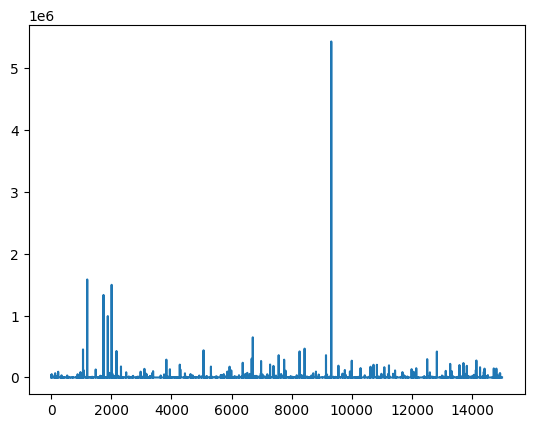

In [28]:
plt.plot(df['adview'])

### Removing  outliers

In [29]:
df = df[df['adview']<2000000]

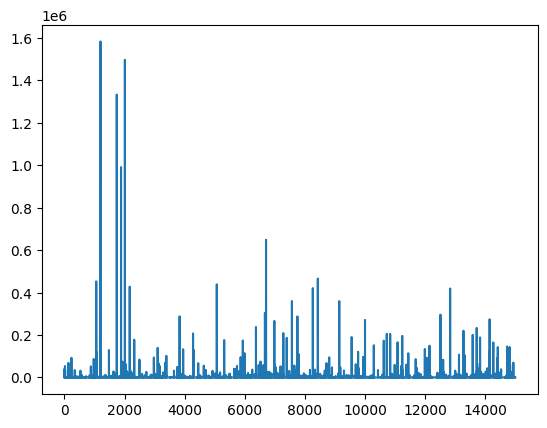

In [30]:
plt.plot(df['adview'])

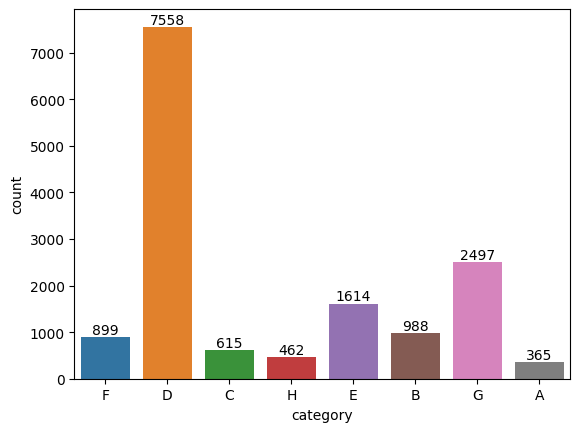

In [31]:
# COUNTPLOT OF CATEGORY

countplot = sns.countplot(data=df,x='category')

for bar in countplot.containers:
    countplot.bar_label(bar,)

* More videos belong to Category D,following G,E

In [32]:
df.groupby(['category'])['adview','views'].mean()

,adview,views
category,,
A,1002.594521,1.759274e+05
B,3010.944332,7.459193e+05
C,792.377236,7.349042e+05
D,1605.424054,6.700709e+05
E,2914.245353,7.336933e+05
F,1601.936596,3.597365e+05
G,1624.943132,1.010366e+06
H,47.629870,7.496324e+05


* On Grouping based on Category feature,we can say that on Average more views for Our AD's are coming from Category G,B,E.

### Correlation Plot

<Axes: >

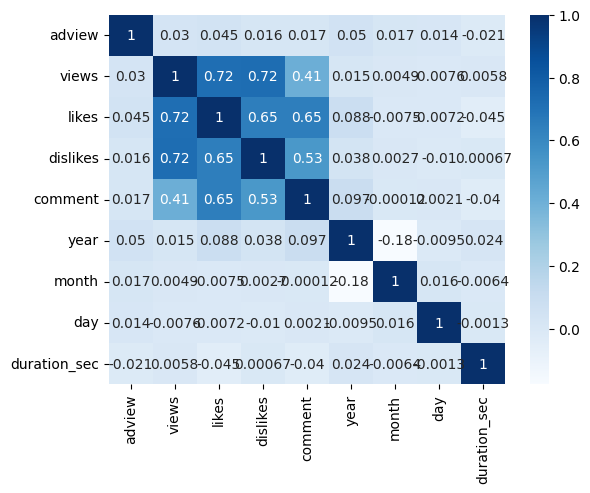

In [33]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

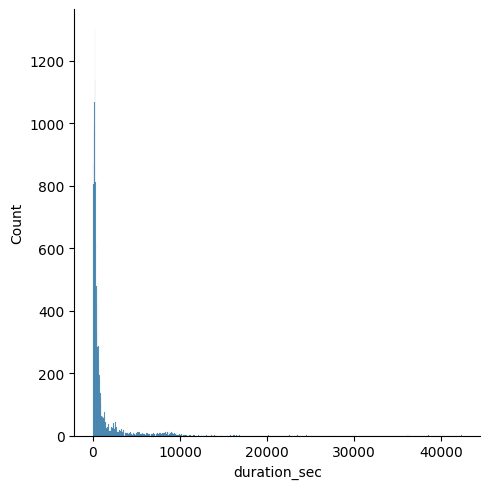

In [34]:
sns.displot(df['duration_sec'])

<Axes: >

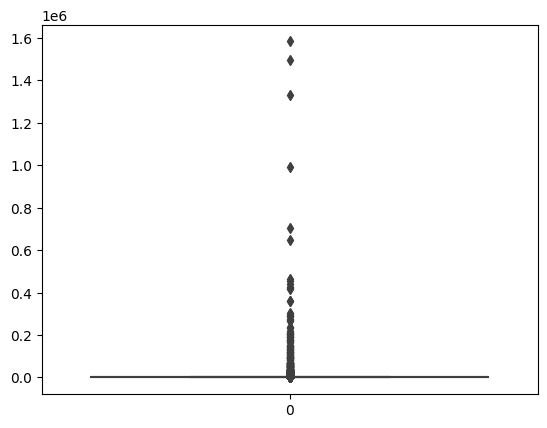

In [35]:
sns.boxplot(df['adview'])

### Log Transformations

In [36]:
df.head(10)

,adview,views,likes,dislikes,comment,published,category,year,month,day,duration_sec
0,40,1031602,8523,363,1095,2016-09-14,F,2016,9,14,457
1,2,1707,56,2,6,2016-10-01,D,2016,10,1,570
2,1,2023,25,0,2,2016-07-02,C,2016,7,2,136
3,6,620860,777,161,153,2016-07-27,H,2016,7,27,262
4,1,666,1,0,0,2016-06-29,D,2016,6,29,31
5,4,78,0,0,0,2016-05-09,D,2016,5,9,15
6,40621,43118,15,1,0,2015-08-21,D,2015,8,21,200
7,1,14205,55,16,1,2016-08-01,E,2016,8,1,58
8,1,526015,3064,211,2582,2015-11-06,F,2015,11,6,1670
9,1,406992,3831,310,7839,2016-10-03,B,2016,10,3,679


In [37]:
# Specify the columns to apply the log transformation
columns_to_transform = ['views','likes','dislikes','comment','adview','duration_sec']

# Apply log transformation to the selected columns
transformed_df = np.log(df[columns_to_transform]+0.0001)

In [38]:
transformed_df['published'] = df['published']
transformed_df['category'] = df['category']

In [39]:
transformed_df['year'] = transformed_df['published'].dt.year
transformed_df['month'] = transformed_df['published'].dt.month
transformed_df['day'] = transformed_df['published'].dt.day

In [40]:
transformed_df

,views,likes,dislikes,comment,adview,duration_sec,published,category,year,month,day
0,13.846623,9.050524,5.894403,6.998510,3.688882,6.124684,2016-09-14,F,2016,9,14
1,7.442493,4.025353,0.693197,1.791776,0.693197,6.345637,2016-10-01,D,2016,10,1
2,7.612337,3.218880,-9.210340,0.693197,0.000100,4.912656,2016-07-02,C,2016,7,2
3,13.338861,6.655440,5.081405,5.030439,1.791776,5.568345,2016-07-27,H,2016,7,27
4,6.501290,0.000100,-9.210340,-9.210340,0.000100,3.433990,2016-06-29,D,2016,6,29
...,...,...,...,...,...,...,...,...,...,...,...
14994,13.172960,7.036149,4.418842,4.454348,0.693197,5.913503,2015-05-18,A,2015,5,18
14995,13.408554,8.255569,5.049857,6.343881,0.000100,5.463832,2015-10-20,D,2015,10,20
14996,8.154500,2.772595,0.000100,0.000100,1.386319,5.262691,2013-08-23,B,2013,8,23
14997,6.870054,-9.210340,-9.210340,-9.210340,0.000100,3.258100,2010-10-02,G,2010,10,2


In [41]:
df.drop(columns='published',inplace=True)
transformed_df.drop(columns='published',inplace=True)

In [42]:
#IMPORTING LIBRARIES USING SCIKIT LEARN.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
df.columns

Index(['adview', 'views', 'likes', 'dislikes', 'comment', 'category', 'year',
       'month', 'day', 'duration_sec'],
      dtype='object')

In [44]:
transformed_df.columns

Index(['views', 'likes', 'dislikes', 'comment', 'adview', 'duration_sec',
       'category', 'year', 'month', 'day'],
      dtype='object')

In [45]:
#SPLITING THE DATA INTO (X_train, X_test, y_train, y_test).
X1 = df.drop(columns='adview')
y1 = df['adview']
X2 = transformed_df.drop(columns='adview')
y2 = transformed_df['adview']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3,
                                                    random_state=30)

### Encoding

In [47]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [48]:
np.array(X_train['category']).reshape(-1,1)

array([['D'],
       ['G'],
       ['E'],
       ...,
       ['D'],
       ['D'],
       ['F']], dtype=object)

In [49]:
X_train_new = ohe.fit_transform(np.array(X_train['category']).reshape(-1,1))

In [50]:
X_test_new = ohe.transform(np.array(X_test['category']).reshape(-1,1))

In [51]:
ohe_X_train = np.hstack((X_train[['views','likes','dislikes','comment',
                                 'year','month','day','duration_sec']].values
           ,X_train_new))

In [52]:
ohe_X_train[0]

array([ 9.61600547e+00,  2.99573727e+00,  2.07945404e+00, -9.21034037e+00,
        2.01500000e+03,  9.00000000e+00,  2.50000000e+01,  1.09864562e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [53]:
X_train.iloc[0,:]

views           9.616005
likes           2.995737
dislikes        2.079454
comment         -9.21034
duration_sec    1.098646
category               D
year                2015
month                  9
day                   25
Name: 2160, dtype: object

In [54]:
ohe_X_test = np.hstack((X_test[['views','likes','dislikes','comment',
                                 'year','month','day','duration_sec']].values
           ,X_test_new))

### Scaling

In [55]:
scaler = StandardScaler()
scaled_ohe_X_train = scaler.fit_transform(ohe_X_train)
scaled_ohe_X_test = scaler.transform(ohe_X_test)

In [56]:
#EVALUATION MATRICS
def print_error(X_test,y_test,model):
    prediction = model.predict(X_test)
    print("prections_of X_test",prediction)
    print("Mean Absolute Error",mean_absolute_error(y_test,prediction))
    print("Mean Squared Error",mean_squared_error(y_test,prediction))
    print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,prediction)))

### Modelling

### LINEAR REGRESSION

In [57]:
#CREATING THE MODEL OBJECT
lr_model = LinearRegression()
#FIT THE MODEL INTO DATA
lr_model.fit(scaled_ohe_X_train,y_train)

LinearRegression()

In [58]:
#PREDICTING THE y_test and FINDING THE VALUES
print_error(scaled_ohe_X_test,y_test,lr_model)

prections_of X_test [2.09039773 1.49083773 1.56729298 ... 1.61599963 1.18737358 0.6592459 ]
Mean Absolute Error 1.3863209914451193
Mean Squared Error 4.300494513055777
Root Mean Squared Error 2.0737633695906044


### SUPPORT VECTOR REGRESSOR

In [59]:
#CREATING THE MODEL OBJECT
regressor = SVR(kernel='rbf')
#FIT THE MODEL INTO DATA
regressor.fit(scaled_ohe_X_train,y_train)

SVR()

In [60]:
#PREDICTING THE y_test and FINDING THE VALUES
print_error(scaled_ohe_X_test,y_test,regressor)

prections_of X_test [0.49089171 1.09704736 1.10394775 ... 0.18400538 0.90875849 0.03574439]
Mean Absolute Error 1.139961276722037
Mean Squared Error 4.42051298865849
Root Mean Squared Error 2.1025016025341072


### DECISION TREE REGRESSOR

In [61]:
# CREATE A MODEL OBJECT
DT_Regressor = DecisionTreeRegressor(random_state = 0)
#FIT THE MODEL INTO DATA
DT_Regressor.fit(scaled_ohe_X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [62]:
#PREDICTING THE y_test and FINDING THE VALUES
print_error(scaled_ohe_X_test,y_test,DT_Regressor)

prections_of X_test [1.27944397e+01 6.93197179e-01 4.49981078e+00 ... 9.99950003e-05
 2.30259509e+00 6.93197179e-01]
Mean Absolute Error 1.4822318483657018
Mean Squared Error 6.893372584935226
Root Mean Squared Error 2.625523297351449


### RANDOM FOREST REGRESSOR

In [63]:
# CREATE A MODEL OBJECT
RF_Regressor = RandomForestRegressor(n_estimators = 100,random_state = 0)
#FIT THE MODEL INTO DATA
RF_Regressor.fit(scaled_ohe_X_train,y_train)

RandomForestRegressor(random_state=0)

In [64]:
#PREDICTING THE y_test and FINDING THE VALUES
print_error(scaled_ohe_X_test,y_test,RF_Regressor)

prections_of X_test [1.47922394 0.95951049 1.46057023 ... 0.86842845 2.05309121 0.89513935]
Mean Absolute Error 1.2068897596712551
Mean Squared Error 3.4236785299259345
Root Mean Squared Error 1.8503184941857806


### ARTIFICAL NEURAL NETWORK

In [65]:
scaled_ohe_X_train.shape

(10498, 15)

In [66]:
ann = tensorflow.keras.models.Sequential([Dense(6,activation="relu",input_dim = scaled_ohe_X_train.shape[1]),
                                          Dense(6,activation="relu"),
                                          Dense(1,activation="relu")])

In [67]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 96        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [68]:
from tensorflow import keras

In [76]:
optimizer  = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history = ann.fit(scaled_ohe_X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
263/263 [==============================] - 2s 3ms/step - loss: 3.6976 - mean_squared_error: 3.6976 - val_loss: 3.5241 - val_mean_squared_error: 3.5241
Epoch 2/100
263/263 [==============================] - 1s 2ms/step - loss: 3.6805 - mean_squared_error: 3.6805 - val_loss: 3.5486 - val_mean_squared_error: 3.5486
Epoch 3/100
263/263 [==============================] - 1s 2ms/step - loss: 3.6741 - mean_squared_error: 3.6741 - val_loss: 3.5575 - val_mean_squared_error: 3.5575
Epoch 4/100
263/263 [==============================] - 1s 3ms/step - loss: 3.6764 - mean_squared_error: 3.6764 - val_loss: 3.5732 - val_mean_squared_error: 3.5732
Epoch 5/100
263/263 [==============================] - 1s 3ms/step - loss: 3.6691 - mean_squared_error: 3.6691 - val_loss: 3.5921 - val_mean_squared_error: 3.5921
Epoch 6/100
263/263 [==============================] - 1s 3ms/step - loss: 3.6685 - mean_squared_error: 3.6685 - val_loss: 3.5906 - val_mean_squared_error: 3.5906
Epoch 7/100
263/263 [=

In [70]:
type(history)

keras.callbacks.History

In [77]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

Text(0, 0.5, 'mean_squared_error')

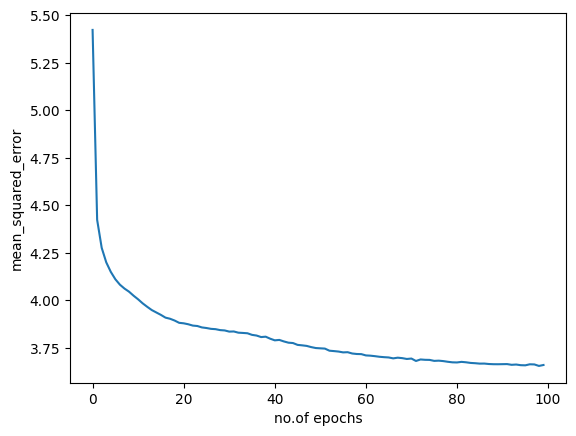

In [75]:
plt.plot(history.history['mean_squared_error'])
plt.xlabel("no.of epochs")
plt.ylabel("mean_squared_error")

Text(0, 0.5, 'val_mean_squared_error')

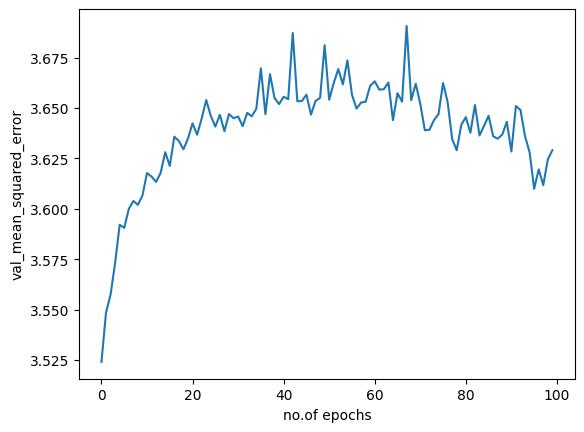

In [79]:
plt.plot(history.history['val_mean_squared_error'])
plt.xlabel("no.of epochs")
plt.ylabel("val_mean_squared_error")

In [74]:
#PREDICTING THE y_test and FINDING THE VALUES
print_error(scaled_ohe_X_test,y_test,ann)

141/141 [==============================] - 1s 4ms/step
prections_of X_test [[1.073451  ]
 [1.2812068 ]
 [1.2990752 ]
 ...
 [1.5966101 ]
 [0.9027739 ]
 [0.49159974]]
Mean Absolute Error 1.2567573115002877
Mean Squared Error 3.804919834441829
Root Mean Squared Error 1.9506203716873842


**Mean Squared Error is low for Radom Forest Regressor,,so it is best suitable for the given dataset.**

### Saving the Model & Prediction

In [80]:
import pickle
# Saving ML Model as pickle file
pickle.dump(RF_Regressor,open('random_forest_model.sav','wb'))

# Saving OneHotEncoder as pickle file
pickle.dump(ohe,open('youtube_dataset_ohe.sav','wb'))

# Saving StandardScaler as pickle file
pickle.dump(scaler,open('youtube_dataset_scaler.sav','wb'))

In [81]:
loaded_model = pickle.load(open('random_forest_model.sav','rb'))
loaded_encoder = pickle.load(open('youtube_dataset_ohe.sav','rb'))
loaded_scaler = pickle.load(open('youtube_dataset_scaler.sav','rb'))

In [83]:
data = [308549,233,74,36,'D',2012,8,22,2593]

In [84]:
data[4]

'D'

In [85]:
loaded_encoder.transform(np.array(data[4]).reshape(-1,1))

array([[0, 0, 1, 0, 0, 0, 0]], dtype=int32)

In [86]:
ohe.transform(np.array(['A']).reshape(-1,1)) # DROP_FIRST = TRUE

array([[0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [87]:
input_data =np.hstack((
            [[data[0],data[1],data[2],data[3],data[5],data[6],data[7],data[8]]],
            loaded_encoder.transform(np.array(data[4]).reshape(-1,1))
))

In [88]:
input_data

array([[308549,    233,     74,     36,   2012,      8,     22,   2593,
             0,      0,      1,      0,      0,      0,      0]])

In [90]:
scaled_input_data = loaded_scaler.transform(input_data)

In [91]:
loaded_model.predict(scaled_input_data)

array([5.05414875])

### Test.CSV

In [94]:
test_df = pd.read_csv('/content/drive/MyDrive/Data_sets/test.csv')

In [96]:
test_df

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [97]:
#INSTERD OF REMOVING ALL ROWS THAT CONTAIN "F" (views,likes,dislikes,comment). IT IS BETTER TO CHANGE "F"VALUES TO "0".
#IF WE DROP "F" THEN THERE WILL BE LOSS OF DATA
test_df['views'].replace(to_replace='F',value=0,inplace=True)
test_df['comment'].replace(to_replace='F',value=0,inplace=True)
test_df['likes'].replace(to_replace='F',value=0,inplace=True)
test_df['dislikes'].replace(to_replace='F',value=0,inplace=True)

In [98]:
test_df[['views','comment','likes','dislikes']] = test_df[['views','comment','likes','dislikes']].astype('int32')

In [99]:
test_df['published'] = pd.to_datetime(test_df['published'])

test_df['year'] = test_df['published'].dt.year
test_df['month'] = test_df['published'].dt.month
test_df['day'] = test_df['published'].dt.day

In [100]:
test_df['duration'] = test_df['duration'].apply(lambda x : x[2:])

In [101]:
test_df['duration_sec'] = test_df['duration'].apply(get_total_seconds)

In [102]:
test_df.drop(columns=['vidid','duration'],inplace=True)

In [103]:
test_new = ohe.fit_transform(np.array(test_df['category']).reshape(-1,1))

In [104]:
ohe_test = np.hstack((test_df[['views','likes','dislikes','comment',
                                 'year','month','day','duration_sec']].values
           ,test_new))

In [105]:
scaled_ohe_test = scaler.transform(ohe_test)

In [109]:
preds = RF_Regressor.predict(scaled_ohe_test)

In [110]:
with open("predictedAdView.csv", 'w') as f:
    for s in preds:
        f.write(str(s) + ',')